In [1]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

je veux un dataframe avec trois colonnes les competences, les medianes et les comptes

In [4]:
df_exploded = df.explode('job_skills')

In [43]:
df_exploded_spe = df_exploded[df_exploded['job_title_short'] == 'Data Analyst']
skills_stat = df_exploded_spe.groupby('job_skills').agg(
    skills_count=('job_skills', 'count'),  # Compte le nombre d'occurrences
    median_salary=('salary_year_avg', 'median')  # Calcule la médiane des salaires
).reset_index()
skills_stat.set_index('job_skills', inplace=True)

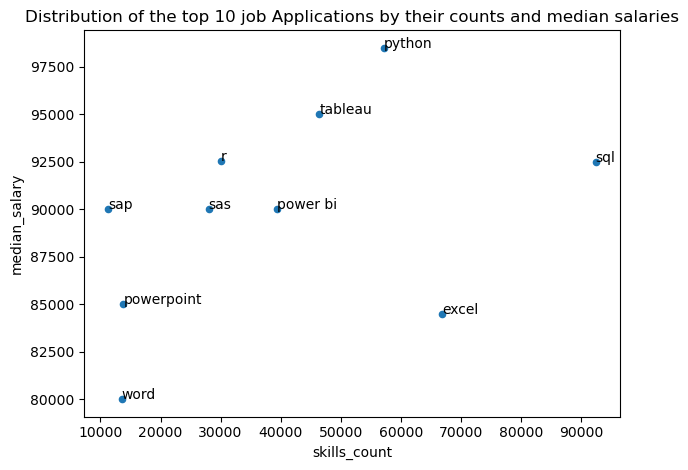

In [72]:
skills_stat = skills_stat.sort_values(by='skills_count', ascending=False).head(10)
# i could have used inplace= True, but then the head() method would not have worked
skills_stat.plot(kind='scatter', x='skills_count', y='median_salary')
plt.title('Distribution of the top 10 job Applications by their counts and median salaries')
plt.tight_layout()
for i in skills_stat.index:
    plotter = skills_stat.loc[i]
    plt.text(plotter['skills_count'],plotter['median_salary'], i)
plt.show()